In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bmark.utils.config import load_config
from bmark.utils.dataset import get_kfold_ind
from bmark.utils.analysis import order_cat
sns.set_theme(style="whitegrid")

In [2]:
paths = load_config()
ad = sc.read_h5ad(paths['pilot']['data_dir']/'consolidated.h5ad')

In [3]:
ad.obs.head(2)

,cluster_id,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,genes_detected,size,total_reads,umi_counts,mtx_rowsums
sample_id,,,,,,,,,,,,,,
AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,80,L6b Shisa6_2,#464576,15,L6b,#53377D,2,Glutamatergic,#00ADEE,4772,1900,164951,18830,28466
AAACCCAAGTCGAATA-1L8TX_181211_01_A02,74,L6 CT Cpa6,#338C5E,14,L6 CT,#2D8CB8,2,Glutamatergic,#00ADEE,3803,63938,113049,12746,19669


In [4]:
ad.var.head(2)

,gene_id
ensemble_id,
ENSMUSG00000051951,Xkr4
ENSMUSG00000089699,Gm1992


In [5]:
print(f'Features: {ad.var.index.name}')
print(f'Cell index: {ad.obs.index.name}')
print(f'Number of cells: {ad.obs.shape[0]}')
print(f'Number of features (genes): {ad.var.shape[0]}')

Features: ensemble_id
Cell index: sample_id
Number of cells: 40026
Number of features (genes): 31053


In [6]:
# number of ids should match number of labels
assert ad.obs['cluster_id'].unique().size == ad.obs['cluster_label'].unique().size
assert ad.obs['subclass_id'].unique().size == ad.obs['subclass_label'].unique().size
assert ad.obs['class_id'].unique().size == ad.obs['class_label'].unique().size

In [7]:
# number of ids should match number of unique id-label pairs
assert ad.obs['cluster_id'].unique().size == \
       ad.obs[['cluster_id','cluster_label']].drop_duplicates().shape[0]

assert ad.obs['subclass_id'].unique().size == \
       ad.obs[['subclass_id','subclass_label']].drop_duplicates().shape[0]

assert ad.obs['class_id'].unique().size == \
       ad.obs[['class_id','class_label']].drop_duplicates().shape[0]

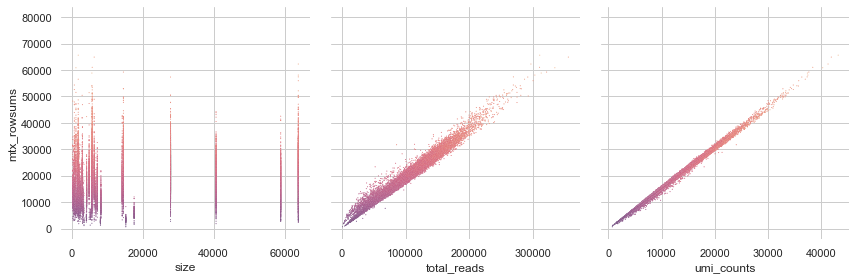

In [8]:
g = sns.PairGrid(ad.obs,
                 x_vars=['size', 'total_reads', 'umi_counts'],
                 y_vars=['mtx_rowsums'],
                 hue='genes_detected',
                 height=4, aspect=1)
g.map(sns.scatterplot, s=1, palette="flare_r")
g.set(ylim=(-4000, 84000))
for ax in g.axes.flat:
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)

In [9]:
# Training and validation splits for a particular fold
train_ind, val_ind = get_kfold_ind(obs=ad.obs, stratify_by='cluster_label', fold=0, n_folds=10)
ad_train = ad[train_ind,:]
ad_val = ad[val_ind,:]
print(f'train size: {ad_train.shape[0]}, val. size: {ad_val.shape[0]}')

train size: 36023, val. size: 4003


In [10]:
#Ordering categorical values for plotting convenience
_, cluster_id_order = order_cat(obs=ad.obs, cat='cluster', by='id')
ad.obs['cluster_label'] = ad.obs['cluster_label'].astype(cluster_id_order)

_, subclass_id_order = order_cat(obs=ad.obs, cat='subclass', by='id')
ad.obs['subclass_label'] = ad.obs['subclass_label'].astype(subclass_id_order)

col_dict = ad.obs[['cluster_label','cluster_color']].drop_duplicates()
col_dict = dict(zip(col_dict['cluster_label'], col_dict['cluster_color']))

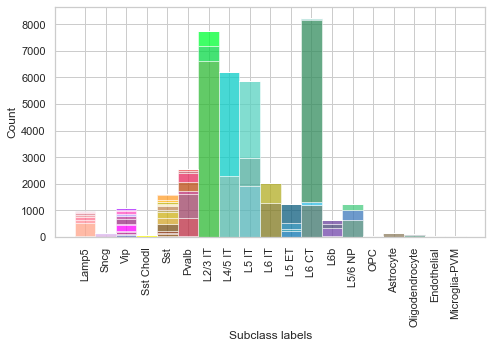

In [11]:
f, ax = plt.subplots(1,1,figsize=(7, 5))
s = sns.histplot(data=ad.obs, x="subclass_label", hue="cluster_label", 
                 multiple="stack",palette=col_dict,edgecolor="1",linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_xlabel('Subclass labels')
s.legend_.remove()
plt.tight_layout()

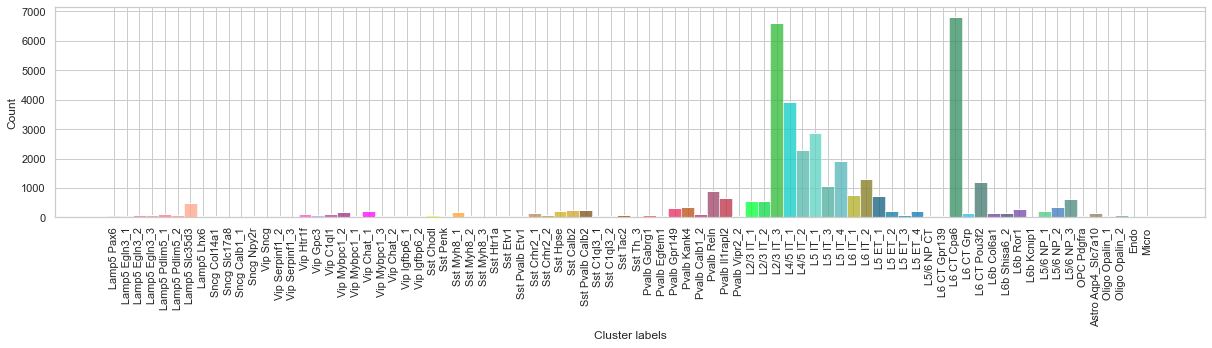

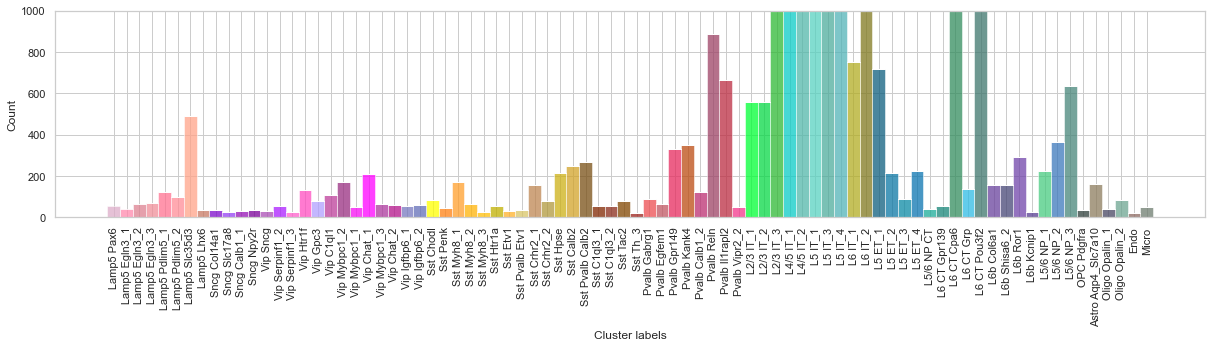

In [12]:
f, ax = plt.subplots(1, 1, figsize=(17, 5))
s = sns.histplot(data=ad.obs, x="cluster_label", hue="cluster_label",
                 multiple="stack", palette=col_dict, edgecolor="1", linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Cluster labels')
s.legend_.remove()
plt.tight_layout()
plt.show()

f, ax = plt.subplots(1, 1, figsize=(17, 5))
s = sns.histplot(data=ad.obs, x="cluster_label", hue="cluster_label",
                 multiple="stack", palette=col_dict, edgecolor="1", linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Cluster labels', ylim=(0, 1000))
s.legend_.remove()
plt.tight_layout()
plt.show()

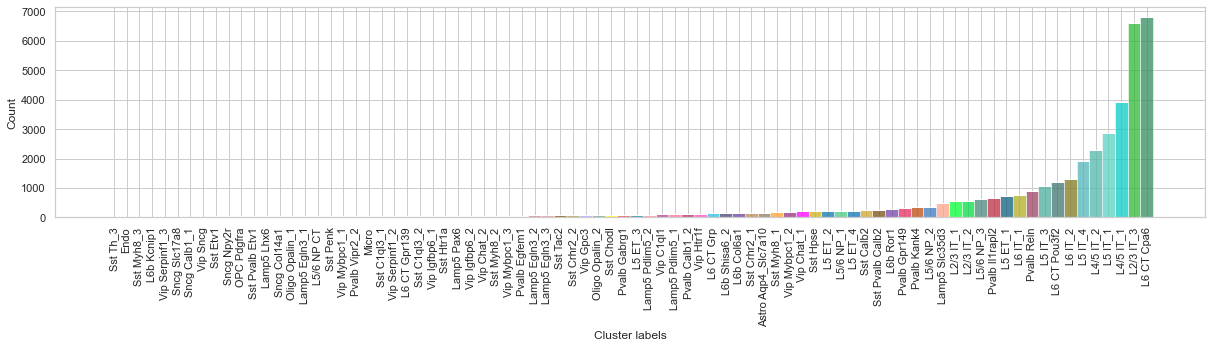

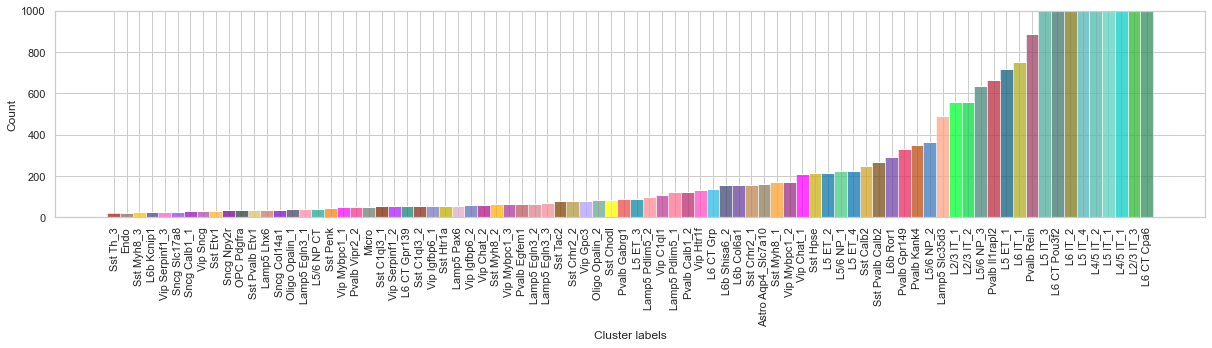

In [13]:
_, cluster_count_order = order_cat(obs=ad.obs, cat='cluster', by='count')
ad.obs['cluster_label'] = ad.obs['cluster_label'].astype(cluster_count_order)

_, subclass_count_order = order_cat(obs=ad.obs, cat='subclass', by='count')
ad.obs['subclass_label'] = ad.obs['subclass_label'].astype(subclass_count_order)

f, ax = plt.subplots(1, 1, figsize=(17, 5))
s = sns.histplot(data=ad.obs, x="cluster_label", hue="cluster_label",
                 multiple="stack", palette=col_dict, edgecolor="1", linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Cluster labels')
s.legend_.remove()
plt.tight_layout()
plt.show()

f, ax = plt.subplots(1, 1, figsize=(17, 5))
s = sns.histplot(data=ad.obs, x="cluster_label", hue="cluster_label",
                 multiple="stack", palette=col_dict, edgecolor="1", linewidth=.5, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Cluster labels', ylim=(0, 1000))
s.legend_.remove()
plt.tight_layout()
plt.show()